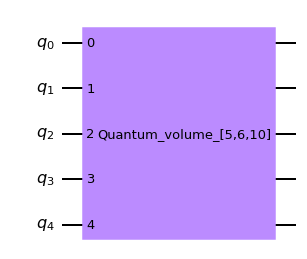

In [1]:
from qiskit.circuit.library import QuantumVolume
import qiskit.tools.jupyter
circuit = QuantumVolume(5, 6, seed=10)
circuit.draw('mpl')

In [2]:
from qiskit.circuit.library import QuantumVolume
import qiskit.tools.jupyter
circuit = QuantumVolume(5, 6, seed=10, classical_permutation=False)
%circuit_library_info circuit.decompose()